In [1]:
import pandas as pd


df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_10lac
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
lab.fit_transform(df.company)

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
lab.fit_transform(df.job)

array([2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1])

In [4]:
df.degree = lab.fit_transform(df.degree)

In [5]:
df.company = lab.fit_transform(df.company)
df.job = lab.fit_transform(df.job)

In [6]:
df.head()

,company,job,degree,salary_more_then_10lac
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [7]:
x = df.drop("salary_more_then_10lac",axis = 1)
y = df.salary_more_then_10lac

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [9]:
x_train

,company,job,degree
6,0,2,1
8,0,0,0
10,1,2,0
2,2,0,0
11,1,2,1
12,1,0,0
15,1,1,1
1,2,2,1
0,2,2,0
4,2,1,0


In [10]:
x_train.shape

(12, 3)

In [11]:
x_test.shape

(4, 3)

In [12]:
from sklearn.tree import DecisionTreeClassifier

reg = DecisionTreeClassifier()
reg.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
y_predicted = reg.predict(x_test)
y_predicted

array([0, 1, 1, 0], dtype=int64)

In [14]:
y_test

5     1
3     1
14    1
7     0
Name: salary_more_then_10lac, dtype: int64

In [15]:
reg.score(x_test,y_test)

0.75

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm,annot = True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")

Text(50.7222,0.5,'TRUTH')

In [18]:
df1 = pd.read_csv("iris.csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
from sklearn.preprocessing import LabelEncoder

LAB = LabelEncoder()

df1.variety = LAB.fit_transform(df1.variety)

df1

df1.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
x1 = df1.drop("variety", axis = 1)
y1 = df1.variety



In [21]:
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.2)


In [22]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()

dct.fit(x_train1, y_train1)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
yp = dct.predict(x_test1)
yp

array([1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2])

In [24]:
dct.score(x_test1,y_test1)


0.9666666666666667

In [25]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1,yp)
cm1


array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]], dtype=int64)

Text(33,0.5,'Truth')

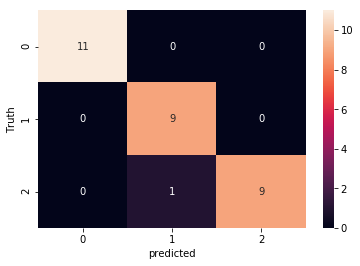

In [26]:
sn.heatmap(cm1,annot= True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [27]:
from sklearn.metrics import classification_report , accuracy_score 



In [30]:
print(classification_report(y_test1,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      1.00      0.95         9
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [32]:
print(accuracy_score(y_test1,yp))

0.9666666666666667
